In [1]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.18.0


In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


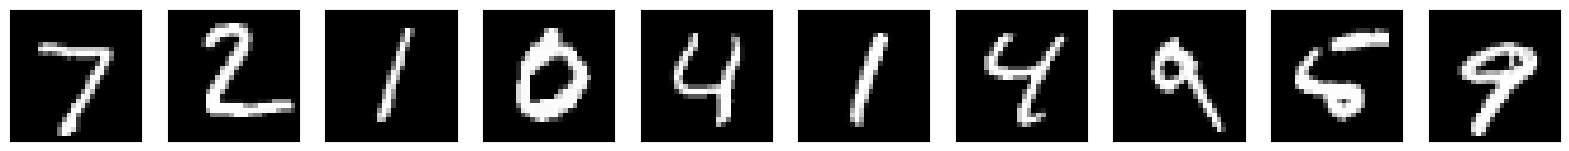

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 7)) #xchange(2,2)

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

![image.png](attachment:7b66c461-7e86-42f8-8fa2-1cb11eaaaaa2.png)

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [8]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

In [9]:
############
# Decoding #
############
decode_model=Sequential()

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv2
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [10]:
autoencoder = Sequential([encode_model, decode_model])

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 30)                  │         167,166 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 28, 28, 1)           │          14,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,215 (707.87 KB)

 Trainable params: 181,215 (707.87 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras import models

In [14]:
autoencoder.save('Conv_autoencoder.keras')

In [15]:
encode_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 392)                 │         154,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │          11,790 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,166 (652.99 KB)

 Trainable params: 167,166 (652.99 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
decode_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 392)                 │          12,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,049 (54.88 KB)

 Trainable params: 14,049 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [19]:
# Train the model

history = autoencoder.fit(x_train, x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7941 - loss: 0.2905 - val_accuracy: 0.8045 - val_loss: 0.1298
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8075 - loss: 0.1257 - val_accuracy: 0.8086 - val_loss: 0.1114
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8104 - loss: 0.1104 - val_accuracy: 0.8106 - val_loss: 0.1039
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8113 - loss: 0.1042 - val_accuracy: 0.8108 - val_loss: 0.0996
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8124 - loss: 0.1001 - val_accuracy: 0.8117 - val_loss: 0.0964
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8125 - loss: 0.0970 - val_accuracy: 0.8120 - val_loss: 0.0939
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8132 - loss: 0.0948 - val_accuracy: 0.8125 - val_loss: 0.0928
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8132 - loss: 0.0931 - val_accuracy: 

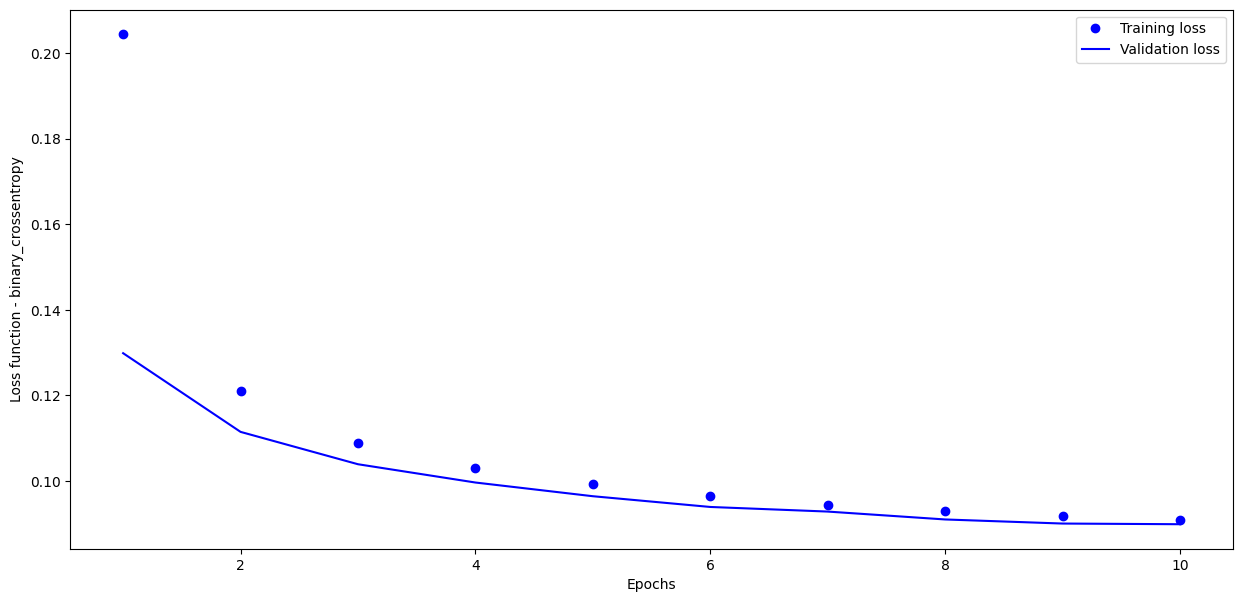

In [20]:
losses = history.history['loss']
losses_val = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

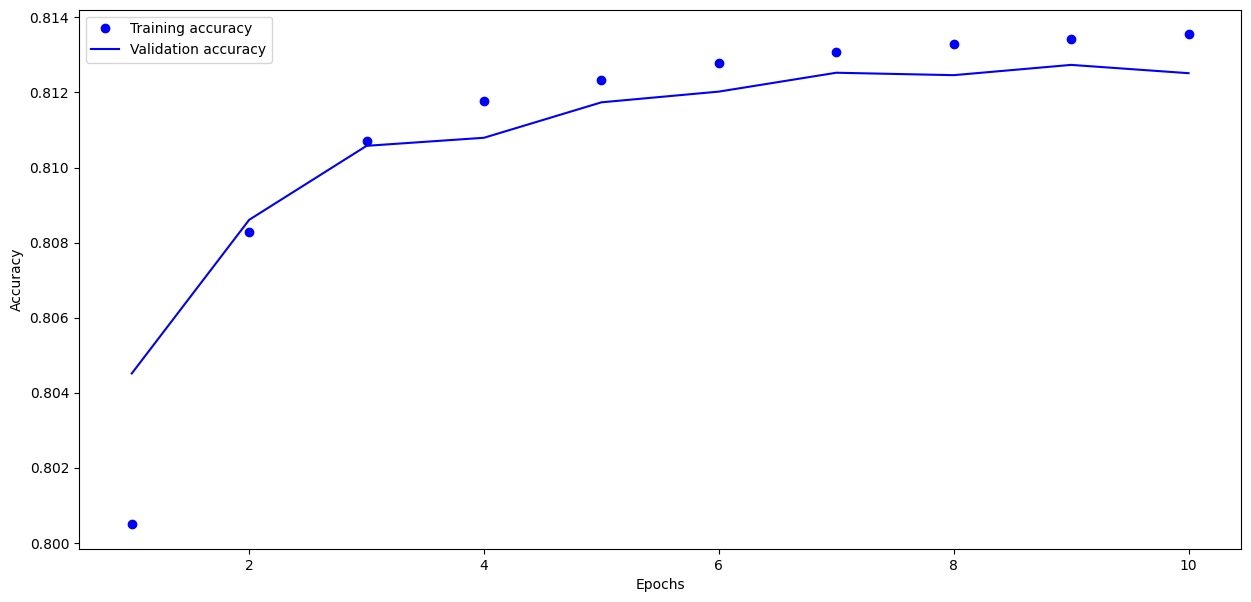

In [21]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


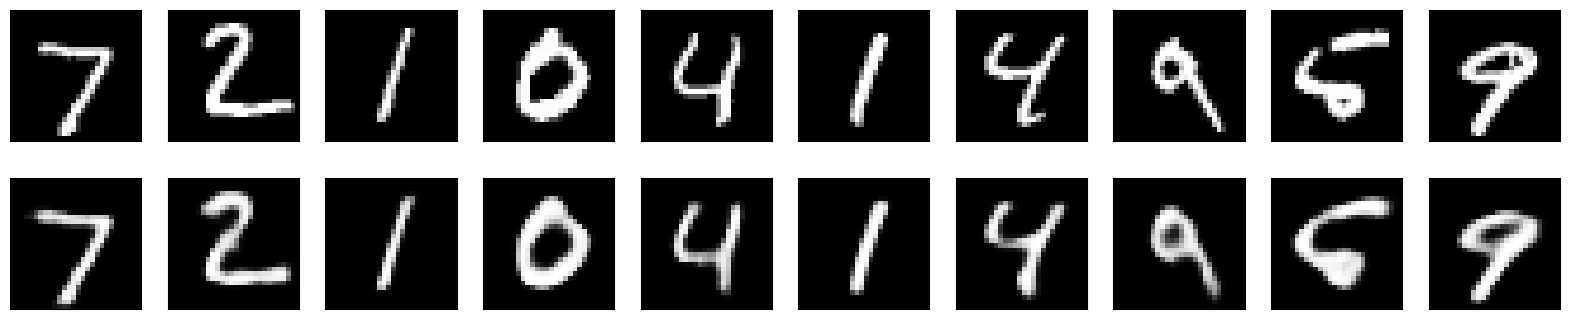

In [22]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

![image.png](attachment:f51e6fad-c8b0-48ee-b841-08b51142fe9c.png)

In [23]:
# optimizer is not so good,
# epoch number should be edded

## Lab Logbook requirement:

1) Copy the autoencoder model and train it with epochs=Z+40,
where your SID is: XXXXXXZ
Leave other parameters the same as in Task 2.

2) Please only add to your Lab Logbook print-screens of:
- Table of your model autoencoder.summary()
- Code of your autoencoder.fit()
- Accuracy detailed graph
- Document the plot of the decoded images for task 2. Change the colour, appearance, and shape of the plot according to your own choice (see plt.figure() parameters).


NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.

In [24]:
autoencoder_2 = models.load_model('Conv_autoencoder.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
autoencoder_2.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history_2 = autoencoder_2.fit(x_train, x_train,  epochs=43, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5579 - loss: 0.6920 - val_accuracy: 0.6558 - val_loss: 0.6909
Epoch 2/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6848 - loss: 0.6905 - val_accuracy: 0.7471 - val_loss: 0.6891
Epoch 3/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7633 - loss: 0.6885 - val_accuracy: 0.7920 - val_loss: 0.6865
Epoch 4/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7984 - loss: 0.6857 - val_accuracy: 0.8052 - val_loss: 0.6830
Epoch 5/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8075 - loss: 0.6819 - val_accuracy: 0.8071 - val_loss: 0.6781
Epoch 6/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8082 - loss: 0.6765 - val_accuracy: 0.8072 - val_loss: 0.6711
Epoch 7/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8089 - loss: 0.6687 - val_accuracy: 0.8072 - val_loss: 0.6606
Epoch 8/43
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8090 - loss: 0.6569 - val_accuracy: 0

In [35]:
print(len(epochs))  # Should be 10
print(len(accuracy_array_2))  # Should also be 10
print(len(val_accuracy_array_2))  # Should also match epochs

10
43
43


<ipython-input-37-e9863e1862e0>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy_array_2, 'bo', label='Training accuracy', color='r')


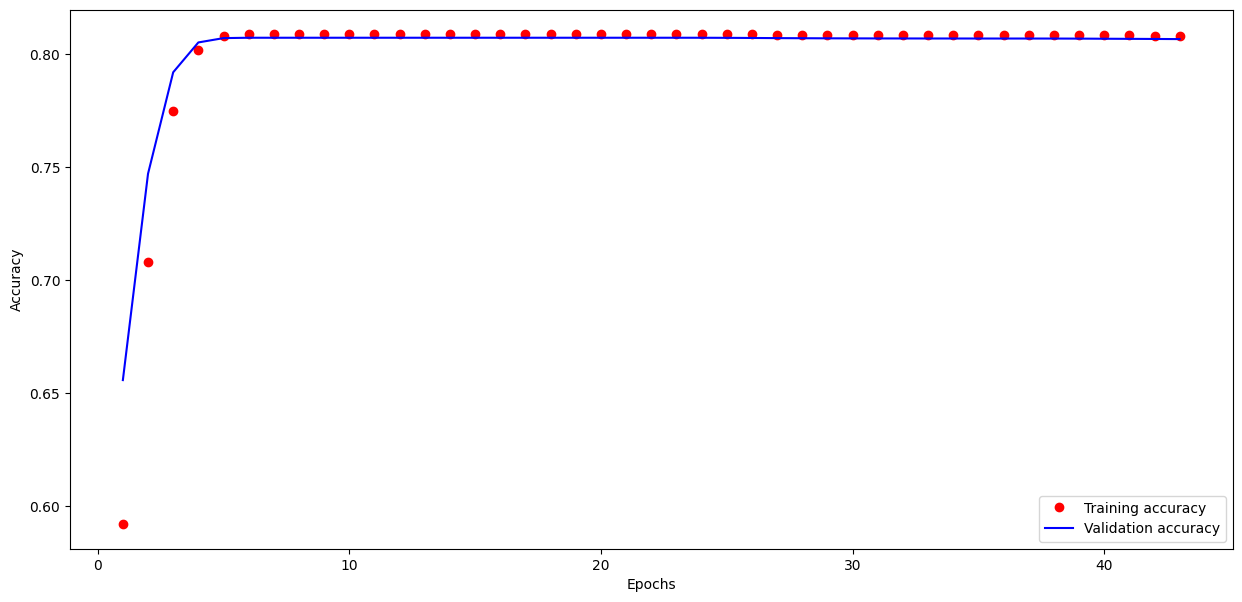

In [37]:
accuracy_array_2 = history_2.history['accuracy']
val_accuracy_array_2 = history_2.history['val_accuracy']
epochs = range(1, len(accuracy_array_2) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array_2, 'bo', label='Training accuracy', color='r')
plt.plot(epochs, val_accuracy_array_2, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
